<a href="https://colab.research.google.com/github/Ganesh-DSML/flipitnews/blob/main/FlipitNews_NLP_BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, roc_curve

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## Reading the data

In [ ]:
data = 'https://drive.google.com/uc?id=1I3-pQFzbSufhpMrUKAROBLGULXcWiB9u&export=download'

try:
    df = pd.read_csv(data)
except pd.errors.ParserError:
    df = pd.read_csv(data, sep=';')
    df = pd.read_csv(data, sep='\t')

## Exploring the data

In [ ]:
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


### Shape of the dataset

In [ ]:
r = 'No. of Rows'
c = 'No. Of Columns'
print(f'{r}: {df.shape[0]}')
print(f'{c}: {df.shape[1]}')

No. of Rows: 2225
No. Of Columns: 2


### News articles per category

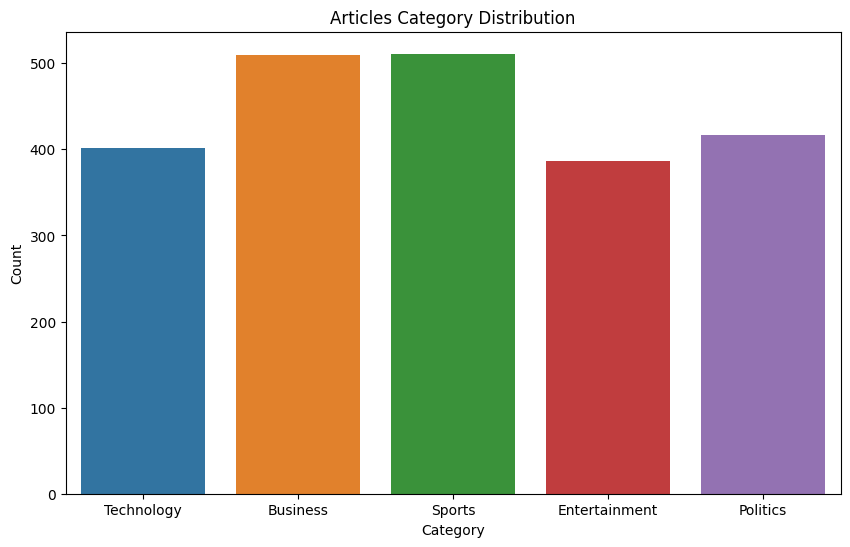

In [ ]:
plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = df['Category'], hue = 'Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Articles Category Distribution')
plt.show()

## Processing the Textual Data

In [ ]:
before_preprocessing = df['Article'][1]

In [ ]:
import re
stop_words = list(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
#data preprocessing
def preprocess_text(text_data):
  text_data = text_data.lower()
  text_data = re.sub('[^a-zA-Z0-9]', " ",text_data) # Removing non-letters
  text_data = nltk.word_tokenize(text_data) # Tokenizing the text
  text_data = [lemmatizer.lemmatize(word) for word in text_data if word not in stop_words] # Removing stopwords and lemmatization
  text_data = ' '.join(text_data)
  return text_data

In [ ]:
df['Article_new'] = df['Article'].apply(preprocess_text)
df.head()

,Category,Article,Article_new
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...


In [ ]:
after_preprocessing = df['Article_new'][1]

In [ ]:
print('Sample Before Preprocessing:')
before_preprocessing

Sample Before Preprocessing:


'worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (£5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financi

In [ ]:
print('Sample After Preprocessing:')
after_preprocessing

Sample After Preprocessing:


'worldcom bos left book alone former worldcom bos bernie ebbers accused overseeing 11bn 5 8bn fraud never made accounting decision witness told juror david myers made comment questioning defence lawyer arguing mr ebbers responsible worldcom problem phone company collapsed 2002 prosecutor claim loss hidden protect firm share mr myers already pleaded guilty fraud assisting prosecutor monday defence lawyer reid weingarten tried distance client allegation cross examination asked mr myers ever knew mr ebbers make accounting decision aware mr myers replied ever know mr ebbers make accounting entry worldcom book mr weingarten pressed replied witness mr myers admitted ordered false accounting entry request former worldcom chief financial officer scott sullivan defence lawyer trying paint mr sullivan admitted fraud testify later trial mastermind behind worldcom accounting house card mr ebbers team meanwhile looking portray affable bos admission pe graduate economist whatever ability mr ebbers t

In [ ]:
print('List of Preprocessed elements:')
for word in before_preprocessing.split():
  if word not in after_preprocessing.split():
    print(word,end = ' <> ')

List of Preprocessed elements:
boss <> books <> boss <> who <> is <> of <> an <> $11bn <> (£5.8bn) <> decisions <> a <> has <> jurors. <> the <> comments <> under <> by <> lawyers <> who <> have <> been <> that <> was <> not <> for <> s <> problems. <> the <> in <> and <> prosecutors <> that <> losses <> were <> to <> the <> s <> shares. <> has <> to <> and <> is <> prosecutors. <> on <> to <> his <> from <> the <> allegations. <> during <> he <> if <> he <> an <> . <> not <> that <> i <> am <> of <> replied. <> did <> you <> to <> an <> into <> books <> pressed. <> no <> the <> witness. <> has <> that <> he <> entries <> at <> the <> of <> sullivan. <> lawyers <> have <> been <> to <> who <> has <> and <> will <> in <> the <> as <> the <> s <> of <> cards. <> are <> to <> him <> as <> an <> boss <> who <> by <> his <> own <> is <> more <> than <> economist. <> his <> abilities <> from <> a <> into <> a <> $160bn <> telecoms <> and <> of <> the <> 1990s. <> s <> problems <> as <> and <

## Encoding and Transforming the data

### Encoding Target varaible

In [ ]:
# Encode Category variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df['Category'].value_counts()

,count
Category,
3,511
0,510
2,417
4,401
1,386


In [ ]:
df.head()

,Category,Article,Article_new
0,4,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,0,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,3,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,3,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,1,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...


### Bag of Words

In [ ]:
#create bag of words
cv = CountVectorizer()
X = cv.fit_transform(df['Article_new']).toarray()

In [ ]:
print('Bag of Words Array:')
X

Bag of Words Array:


array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### TF-IDF

In [ ]:
tf_idf = TfidfVectorizer()
X = tf_idf.fit_transform(df['Article_new']).toarray()
y = np.array(df['Category'].values)

In [ ]:
print('TF-IDF Input Array: (X)')
X

TF-IDF Input Array: (X)


array([[0.        , 0.01904352, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02374178, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.02603253, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01595365, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
print('TF-IDF Target Array: (Y)')
y

TF-IDF Target Array: (Y)


array([4, 0, 3, ..., 1, 2, 3])

### Train-Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True, stratify = y)
print('Shape of Training Dataset')
print('*'*25)
print('Rows in training dataset: ', x_train.shape[0])
print('Columns in training dataset: ', x_train.shape[1])
print('*'*25)
print('Rows in testing dataset: ', x_test.shape[0])
print('Columns in testing dataset: ', x_test.shape[1])
print('*'*25)
print('Shape of Target Dataset')
print('*'*25)
print('Rows in Target dataset: ', y_train.shape[0])
print('Rows in testing dataset: ', y_test.shape[0])

Shape of Training Dataset
*************************
Rows in training dataset:  1668
Columns in training dataset:  26254
*************************
Rows in testing dataset:  557
Columns in testing dataset:  26254
*************************
Shape of Target Dataset
*************************
Rows in Target dataset:  1668
Rows in testing dataset:  557


## Model Training & Evaluation

### Simple Approach - Naive Bayes

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
y_train_pred = nb_model.predict(x_train)
y_test_pred = nb_model.predict(x_test)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print('Training Accuracy:', round(acc_train,3))
print('Testing Accuracy:', round(acc_test,3))

Training Accuracy: 0.989
Testing Accuracy: 0.984


In [ ]:
print('Train F1 Score:', round(f1_score(y_train,y_train_pred,average='weighted'), 3))
print('Train Recall Score:', round(recall_score(y_train,y_train_pred,average='weighted'), 3))
print('Train Precision Score:', round(precision_score(y_train,y_train_pred,average='weighted'), 3))

print('\nTest F1 Score:', round(f1_score(y_test,y_test_pred,average='weighted'), 3))
print('Test Recall Score:', round(recall_score(y_test,y_test_pred,average='weighted'), 3))
print('Test Precision Score:', round(precision_score(y_test,y_test_pred,average='weighted'), 3))

Train F1 Score: 0.989
Train Recall Score: 0.989
Train Precision Score: 0.989

Test F1 Score: 0.984
Test Recall Score: 0.984
Test Precision Score: 0.984


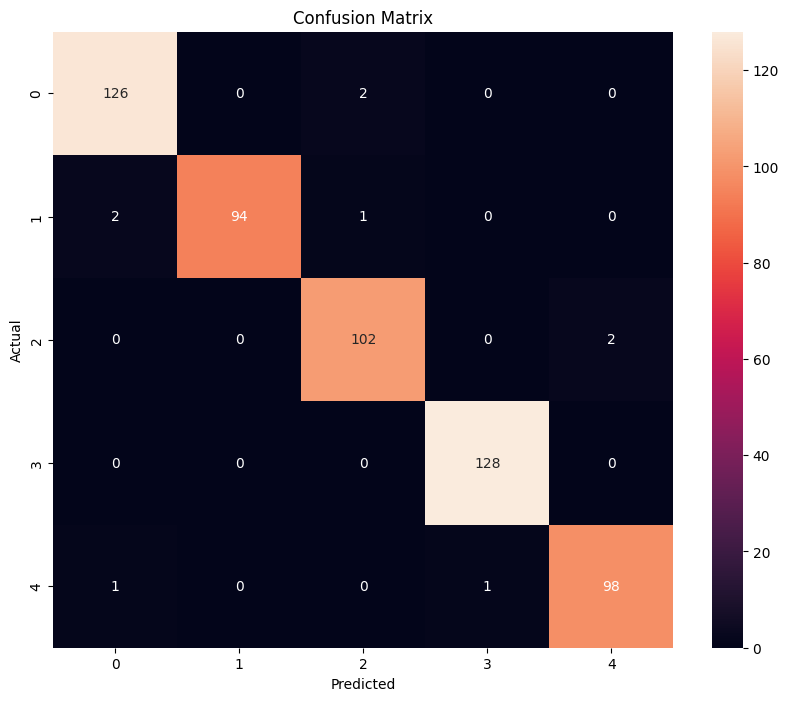

In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       128
           1       1.00      0.97      0.98        97
           2       0.97      0.98      0.98       104
           3       0.99      1.00      1.00       128
           4       0.98      0.98      0.98       100

    accuracy                           0.98       557
   macro avg       0.98      0.98      0.98       557
weighted avg       0.98      0.98      0.98       557



In [ ]:
y_train_pred_proba = nb_model.predict_proba(x_train)
y_test_pred_proba = nb_model.predict_proba(x_test)

roc_train = roc_auc_score(y_train, y_train_pred_proba, average='weighted', multi_class='ovr')
roc_test = roc_auc_score(y_test, y_test_pred_proba, average='weighted', multi_class='ovr')

print('Training ROC AUC Score:', round(roc_train, 3))
print('Testing ROC AUC Score:', round(roc_test, 3))


Training ROC AUC Score: 1.0
Testing ROC AUC Score: 0.999


### Functional Code

In [ ]:
def model_build(rf_model):
  rf_model.fit(x_train, y_train)
  rf_y_train_pred = rf_model.predict(x_train)
  rf_y_test_pred = rf_model.predict(x_test)
  return rf_y_train_pred, rf_y_test_pred

def model_evaluation(rf_model, rf_y_train_pred, rf_y_test_pred):
  rf_acc_train = accuracy_score(y_train, rf_y_train_pred)
  rf_acc_test = accuracy_score(y_test, rf_y_test_pred)
  print('Training Accuracy:', round(rf_acc_train,3))
  print('Testing Accuracy:', round(rf_acc_test,3))
  print('*_*'*25)
  print('Train F1 Score:', round(f1_score(y_train,rf_y_train_pred,average='weighted'), 3))
  print('Train Recall Score:', round(recall_score(y_train,rf_y_train_pred,average='weighted'), 3))
  print('Train Precision Score:', round(precision_score(y_train,rf_y_train_pred,average='weighted'), 3))
  print('*_*'*25)
  print('Test F1 Score:', round(f1_score(y_test,rf_y_test_pred,average='weighted'), 3))
  print('Test Recall Score:', round(recall_score(y_test,rf_y_test_pred,average='weighted'), 3))
  print('Test Precision Score:', round(precision_score(y_test,rf_y_test_pred,average='weighted'), 3))
  print('*_*'*25)

In [ ]:
def roc_scores(rf_model):
  rf_y_train_pred_proba = rf_model.predict_proba(x_train)
  rf_y_test_pred_proba = rf_model.predict_proba(x_test)

  roc_train = roc_auc_score(y_train, rf_y_train_pred_proba, average='weighted', multi_class='ovr')
  roc_test = roc_auc_score(y_test, rf_y_test_pred_proba, average='weighted', multi_class='ovr')

  print('Training ROC AUC Score:', round(roc_train, 3))
  print('Testing ROC AUC Score:', round(roc_test, 3))

### Model Building

In [ ]:
dtree_model  = DecisionTreeClassifier()
rforest_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

### Decision Tree Classifier

In [ ]:
y_train_pred_dt, y_test_pred_dt = model_build(dtree_model)
model_evaluation(dtree_model, y_train_pred_dt, y_test_pred_dt)
roc_scores(dtree_model)

Training Accuracy: 1.0
Testing Accuracy: 0.867
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Train F1 Score: 1.0
Train Recall Score: 1.0
Train Precision Score: 1.0
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Test F1 Score: 0.867
Test Recall Score: 0.867
Test Precision Score: 0.868
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Training ROC AUC Score: 1.0
Testing ROC AUC Score: 0.916


### Random Forest Classifier

In [ ]:
y_train_pred_rf, y_test_pred_rf = model_build(rforest_model)
model_evaluation(rforest_model, y_train_pred_rf, y_test_pred_rf)
roc_scores(rforest_model)

Training Accuracy: 1.0
Testing Accuracy: 0.98
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Train F1 Score: 1.0
Train Recall Score: 1.0
Train Precision Score: 1.0
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Test F1 Score: 0.98
Test Recall Score: 0.98
Test Precision Score: 0.981
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Training ROC AUC Score: 1.0
Testing ROC AUC Score: 0.999


### KNearest Neighbour Classifier

In [ ]:
y_train_pred_kn, y_test_pred_kn = model_build(knn_model)
model_evaluation(knn_model, y_train_pred_kn, y_test_pred_kn)
roc_scores(knn_model)

Training Accuracy: 0.96
Testing Accuracy: 0.941
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Train F1 Score: 0.96
Train Recall Score: 0.96
Train Precision Score: 0.96
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Test F1 Score: 0.941
Test Recall Score: 0.941
Test Precision Score: 0.942
*_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_**_*
Training ROC AUC Score: 0.998
Testing ROC AUC Score: 0.99
